# Perceptrons - The basis of Artificial Neural Networks

Perceptrons, invented by Frank Rosenblatt in the late 1950's,
are a form of supervised machine learning algorithm inspired by neuron cells.
In neurons, signals come in along the dendrites and out along the axon. 
A synapse is the connection between the axon of one cell and the dendrites of another.
Crudely, input signals are 'summed' and if they reach a certain threshold the neuron 'fires'
and sends a signal down the synapse to the connected cells.

![Perceptron](resources/Perceptron.png "Perceptron Image")

Perceptrons are an algorithmic approximation of this process and can learn to solve simple classification problems.
Input values are multiplied by a learnable parameter called a *weight*.
If the sum of the inputs X weights is over a certain threshold the Perceptron 'fires' and generates an output.
We use the *error* in the output to change the value of the *weights* by a small amount - the *learning rate*.
The process is repeated until the error is 0, or as small as we can get it.

**Note:** The threshold which determines if the Perceptron produces an output is determined by its *activation function*.
For Perceptrons this is usually a step function which outputs a 1 or 0 i.e. 'fires' or not.

### Perceptron - Algorithm
```
1. Set weights to random values in range [-0.5, 0.5]

2. Set learning rate to a small value, usually less than 0.5

3. For each training example in the dataset i.e one 'epoch'

    A. Calculate output (activation)
    
    Sum inputs multiplied by weights
    
    If sum is greater than 0, output = 1, otherwise output = 0
    
    B. Calculate error
    
    error = expected/desired output - activation

    C. Update each of the weights values
    
    change in weight = error X input X learning rate
    
4. Repeat from step 3 until error is 0 (or as close as possible), or for the number of training epochs.
```
Or if you prefer maths...

$y = 1\ if\ \sum\limits_{i=0}^{n} w_i \times x_i \geq\ 0 \\else \\ y = 0\ if\ \sum\limits_{i=0}^{n} w_i \times x_i \lt\ 0 \\where \ x_0 = 1 \ and\ w_0 = -\theta $

**Note:** The last line here is for the bias, where the input is always 1.
Weights are usually denoted by $\theta$ (theta) and the bias weight tends towards the negative.

### Perceptrons - Logical Operators

Logical operators, also know as logical functions or boolean functions,
originate from propositional logic and form the basis logic gates for computation.

There are only two possible values, True and False, represented as 1 and 0.
The functions can be represented using truth tables, with two inputs and one output.
Below is the truth table for the 'AND' function:

| Input 1| Input 2| AND |
|:------:|:------:|:---:|
| 0      | 0      | 0   |
| 0      | 1      | 0   |
| 1      | 0      | 0   |
| 1      | 1      | 1   |

We are going to use this data to show how Perceptrons can learn to represent these logical functions,
though you could also think about it as a prediction/classification problem
i.e. for a given set of inputs what is the correct output.
This table is therefore the Perceptrons *training* data, with each row representing an input example.
Each training example has two inputs (*features*) and one output (*label*).

You can also plot these functions on a graph, which will be handy later, so first lets define our data and make a plot.

**Note:** Input data is often denoted by X and labels with Y,
so here we are going to use train_x and train_y for our variable names.


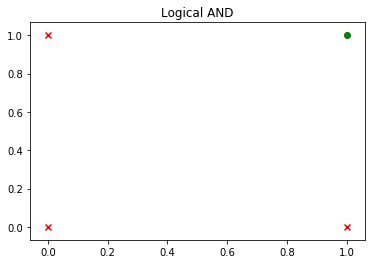

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Training data
train_x = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

train_y = np.array([0, 0, 0, 1]) # AND

# Plot each point on a graph, 'o' for true and 'x' for false
for i in range(len(train_y)):
    if train_y[i] == 1:
        plt.scatter(train_x[i, 0], train_x[i, 1], marker=u'o', facecolors='green')
    else:
        plt.scatter(train_x[i, 0], train_x[i, 1], marker=u'x', facecolors='red')
plt.title("Logical AND")
plt.show()

### Perceptron - Implementation

Now lets write a function to build and train a Perceptron for the AND function.
This is just an implementation of the algorithm above.
As it trains you should see output for the current training epoch and total error for that epoch.
The error should quickly reach 0, if it doesn't try increasing the number of epochs or changing the learning rate.

The num_epochs variable determines how many times we will show the Perceptron *all* of the training data.

The learning_rate variable determines how large a change we will make to the weights each time they are updated.
The learning rate is often denoted as $\alpha$ (alpha).

In [3]:
num_epochs = 10
learning_rate = 0.5

def train_perceptron(inputs, desired_outputs, training_epochs, alpha):
    
    # Set the weights to small random values in the range -0.5 to 0.5
    bias = 1
    bias_w = np.random.uniform(-0.5, 0.5)
    w1 = np.random.uniform(-0.5, 0.5)
    w2 = np.random.uniform(-0.5, 0.5)
    
    # Each epoch will loop over the training data once
    for epoch in range(training_epochs):
        
        total_error = 0
        # Loop over all of the input examples
        for i in range(len(inputs)):
            
            # Calculate output
            weight_sum = (inputs[i][0] * w1) + (inputs[i][1] * w2) + (bias * bias_w)
            
            if weight_sum > 0: # Activation (step) function
                activation = 1
            else:
                activation = 0
    
            # Calculate error (desired output - actual output)
            error = desired_outputs[i] - activation
            total_error += np.absolute(error) # Also keep track of total error for this epoch
            
            # Update weights (error * input * learning rate)
            w1 += error * inputs[i][0] * alpha
            w2 += error * inputs[i][1] * alpha
            bias_w += error * bias * alpha
        
        print("Epoch: " + str(epoch + 1) + " Error: " + str(total_error))
    return w1, w2, bias_w

# Call the function to train the Perceptron and return the trained weights
input_w1, input_w2, bias_w = train_perceptron(train_x, train_y, num_epochs, learning_rate)

Epoch: 1 Error: 2
Epoch: 2 Error: 3
Epoch: 3 Error: 2
Epoch: 4 Error: 3
Epoch: 5 Error: 2
Epoch: 6 Error: 1
Epoch: 7 Error: 0
Epoch: 8 Error: 0
Epoch: 9 Error: 0
Epoch: 10 Error: 0


### Perceptrons - Linear Decision Boundary

To give you an intuition around what the Perceptron is doing, consider the equation for a straight line:

y = ax + c

a and c are coefficients just like the learned weights and bias in the Perceptron.
So with a bit of rearranging:

y = ((input1 x weight1) + (input2 x weight2)) + bias weight

Becomes:

input2 = ((-weight1/weight2) * input1) + (-bias weight/weight2)

weights 1 and 2 = slope

bias = intercept

step function = which side of the line!

So, the Perceptron is essentially learning a function for a straight line which is called the decision boundary.
In this case, which 'class' the set of inputs belongs to i.e. True or False.

We can add this to our plot from before to visualise it.

Input weight 1 = 1.038723884946106
Input weight 2 = 0.5014845378177457
Bias weight = -1.3438341133923455


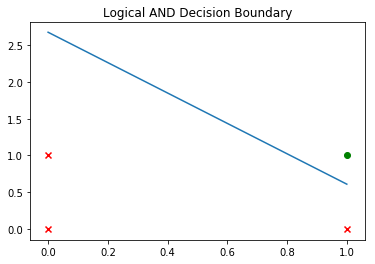

In [4]:
# Print the learned weight values
print("Input weight 1 = " + str(input_w1))
print("Input weight 2 = " + str(input_w2))
print("Bias weight = " + str(bias_w))

x = np.linspace(0, 1)
y = ((-input_w1/input_w2) * x) + (-bias_w/input_w2)

for i in range(len(train_y)):
    if train_y[i] == 1:
        plt.scatter(train_x[i, 0], train_x[i, 1], marker=u'o', facecolors='green')
    else:
        plt.scatter(train_x[i, 0], train_x[i, 1], marker=u'x', facecolors='red')
plt.plot(x,y)
plt.title("Logical AND Decision Boundary")
plt.show()

### Perceptrons - OR and XOR

Now lets try the Perceptron for the OR and XOR functions. The truth table for these is below.

| Input 1| Input 2| OR  | XOR |
|:------:|:------:|:---:|:---:|
| 0      | 0      | 0   | 0   |
| 0      | 1      | 1   | 1   |
| 1      | 0      | 1   | 1   |
| 1      | 1      | 1   | 0   |

Remember the inputs are the same so you should only need to specify the new labels/desired outputs.
You can also change the number of training epochs and learning rate if you wish,
but stick with the values that worked for AND first.

Just call the train_perceptron() function as before with the new values.
You can also copy the code above to display the function and its decision boundary after training

Epoch: 1 Error: 1
Epoch: 2 Error: 1
Epoch: 3 Error: 0
Epoch: 4 Error: 0
Epoch: 5 Error: 0
Epoch: 6 Error: 0
Epoch: 7 Error: 0
Epoch: 8 Error: 0
Epoch: 9 Error: 0
Epoch: 10 Error: 0


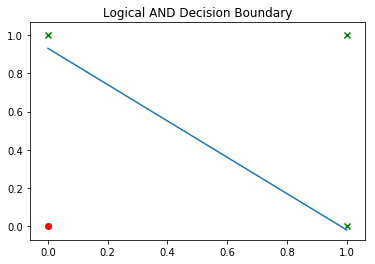

In [120]:

##YOUR CODE HERE##

